In [1]:
import numpy as np
import mlgrad.pbsag as pbsag
import mlgrad.model as model
import mlgrad.loss as loss
import mlgrad.penalty as penalty
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

In [2]:
lm1 = model.LinearModel([1.5,1.5])
lm2 = model.LinearModel([0.5,2.5])

In [3]:
def F(x):
    return np.log(0.4*np.exp(lm1.evaluate(x)) + 0.6*np.exp(lm2.evaluate(x)))

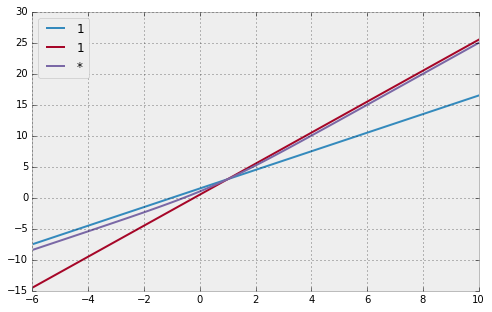

In [4]:
X = np.linspace(-6.,10.,100)
X1 = X.reshape((-1,1))
Y1 = [lm1.evaluate(x) for x in X1]
Y2 = [lm2.evaluate(x) for x in X1]
Z = [F(x) for x in X1]
plt.figure(figsize=(8,5))
plt.plot(X, Y1, label='1')
plt.plot(X, Y2, label='1')
plt.plot(X, Z, label='*')
plt.legend(loc='best')
plt.grid(1)
plt.show()

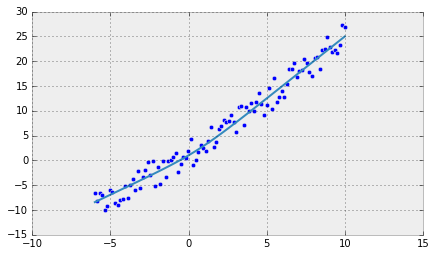

In [5]:
U1 = np.asarray([F(x) for x in X1])
#print(U1)
dU = 2*np.random.random(U1.shape)-1
U2 = U1 + 3.0*dU
plt.figure(figsize=(7,4))
plt.plot(X, U1)
plt.scatter(X, U2)
plt.grid(1)
plt.show()

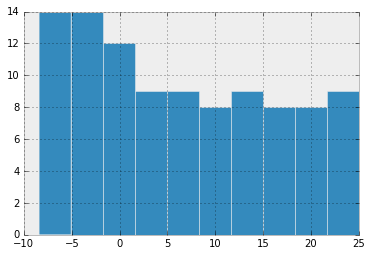

In [6]:
plt.figure()
plt.hist(U1)
plt.figure()
#plt.plot(range(len(U1)), sorted(U1))

49 0.001 [ 2.0763533  2.1437729]
42 0.001 [ 2.08107547  2.14341624]
26 0.001 [ 2.08430041  2.14304223]
27 0.001 [ 2.2289589   2.12905617]
32 0.001 [ 2.14622758  2.13707575]


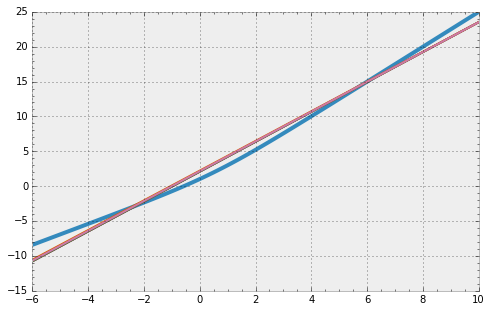

In [9]:
plt.figure(figsize=(8,5))
plt.plot(X, U1, label='orig', linewidth=4.0)
#plt.scatter(X, U2)
params = []
for i in range(5):
    param0 = 3.*np.random.random((2,))
    #print(param0)
    lm = model.LinearModel(param0)
    alg = pbsag.PbSAG(lm, loss=loss.PowerLoss(1.5), penalty=penalty.SquarePenalty(), h=0.001, tol=1.0e-3, max_epoch=5000, ls=0)
    alg.fit(X1, U1)
    print(alg.K, alg.hw_mean, alg.param_mean.base)
    params.append(np.asarray(alg.param_mean.base))
    plt.plot(X1, [lm.evaluate(x) for x in X1], label=str(i))
#plt.legend(loc='best')
plt.grid(1)
plt.minorticks_on()
plt.show()

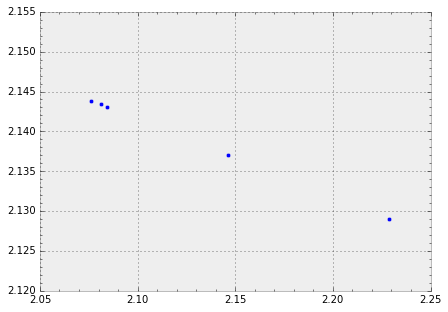

In [10]:
plt.figure(figsize=(7,5))
Xs, Ys = zip(*params)
plt.scatter(Xs, Ys)
plt.grid(1)
plt.minorticks_on()
plt.show()